# Programación Python (avanzado)
## Práctica

### 1. Importar librerías

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Inicializar variables

In [2]:
hostnames = []
dataset = []
df = None

### 3. Función set_hostnames

In [3]:
#Función para generar hostnames

def set_hostnames(number_of_hosts: int) -> None:
    # Linux 40% | Solaris 30% | AIX 20% | HP-UX 10% 
    os = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1
    # Development 10% | Integration 10% | Testing 25% | Staging 25% | Production 30%
    environments = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 
    # Norway 6% | France 9% | Italy 16% | Spain 16% | Germany 23% | Ireland 30%
    countries = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    alpha_group = []
    
    for i in range(number_of_hosts):
        country = random.choice(countries)
        hostname = random.choice(os) + random.choice(environments)
        hostname += country
        alpha_group.append(hostname)
        hostname += str(alpha_group.count(hostname)).zfill(3)
        hostnames.append(hostname)

### 4. Función get_os

In [4]:
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknown'

### 5. Función get_environment

In [5]:
def get_environment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknown'

### 6. Función get_country

In [6]:
def get_country(hostname: str) -> str:
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    elif hostname[2:5] == 'FRA':
        return 'France'
    else:
        return 'Unknown'

### 7. Función set_dataframe

In [7]:
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)
    
    for hostname in hostnames:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'environment': get_environment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:])
        })
        
    df = pd.DataFrame(dataset)

### 8. Crear el DataFrame

In [8]:
set_dataframe(1500)

In [9]:
df

,hostname,os,environment,country,node
0,SSITA001,Solaris,Staging,Italy,1
1,HTITA001,HP-UX,Testing,Italy,1
2,LPESP001,Linux,Production,Spain,1
3,APITA001,AIX,Production,Italy,1
4,SPIRL001,Solaris,Production,Ireland,1
...,...,...,...,...,...
1495,ADNOR004,AIX,Development,Norway,4
1496,SPITA020,Solaris,Production,Italy,20
1497,LPIRL044,Linux,Production,Ireland,44
1498,SIDEU007,Solaris,Integration,Germany,7


### 9. Guardar DataFrame en fichero CSV

In [10]:
df.to_csv(
    'hosts.csv', 
    header=True, 
    index=False
)

### 10. Generar gráfico de DataFrame

In [11]:
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,SSITA001,Solaris,Staging,Italy,1
1,HTITA001,HP-UX,Testing,Italy,1
2,LPESP001,Linux,Production,Spain,1
3,APITA001,AIX,Production,Italy,1
4,SPIRL001,Solaris,Production,Ireland,1
...,...,...,...,...,...
1495,ADNOR004,AIX,Development,Norway,4
1496,SPITA020,Solaris,Production,Italy,20
1497,LPIRL044,Linux,Production,Ireland,44
1498,SIDEU007,Solaris,Integration,Germany,7


In [12]:
hosts_country_environment = hosts_df.groupby(['country', 'environment']).size()
hosts_country_environment

country  environment
France   Development     14
         Integration     18
         Production      35
         Staging         36
         Testing         29
Germany  Development     36
         Integration     40
         Production     103
         Staging         89
         Testing         97
Ireland  Development     47
         Integration     42
         Production     131
         Staging        114
         Testing        129
Italy    Development     21
         Integration     16
         Production      71
         Staging         67
         Testing         62
Norway   Development     10
         Integration      9
         Production      21
         Staging         24
         Testing         17
Spain    Development     23
         Integration     18
         Production      60
         Staging         64
         Testing         57
dtype: int64

In [13]:
hosts_country_environment.unstack()

environment,Development,Integration,Production,Staging,Testing
country,,,,,
France,14,18,35,36,29
Germany,36,40,103,89,97
Ireland,47,42,131,114,129
Italy,21,16,71,67,62
Norway,10,9,21,24,17
Spain,23,18,60,64,57


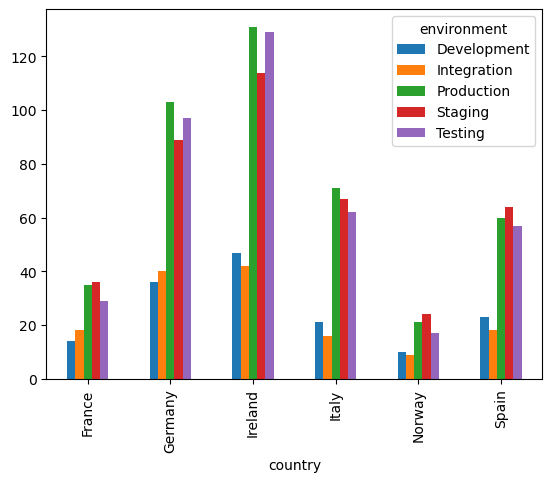

In [14]:
hosts_country_environment.unstack().plot(kind='bar');

### 11. Crear figura con 4 gráficos

In [15]:
#Variables para crear subplots

#Subplot [0,0] Country-OS
hosts_os_country = hosts_df.groupby(['country', 'os']).size()
hosts_os_country = hosts_os_country.unstack()

#Subplot [0,1] Total Operating Systems
total_operating_systems = hosts_df.groupby(['os'])
os_counts = hosts_df['os'].value_counts()
os_percentages = 100 * os_counts / len(df)

#Subplot [1,0] Hosts by Country
country_counts = hosts_df['country'].value_counts()
country_counts_sorted = country_counts.sort_values(ascending=True)
countries_sorted = country_counts_sorted.index
hosts_sorted = country_counts_sorted.values

#Subplot [1,1] Number of hosts
grouped_hosts = hosts_df.groupby(['country', 'environment']).size().unstack(0)

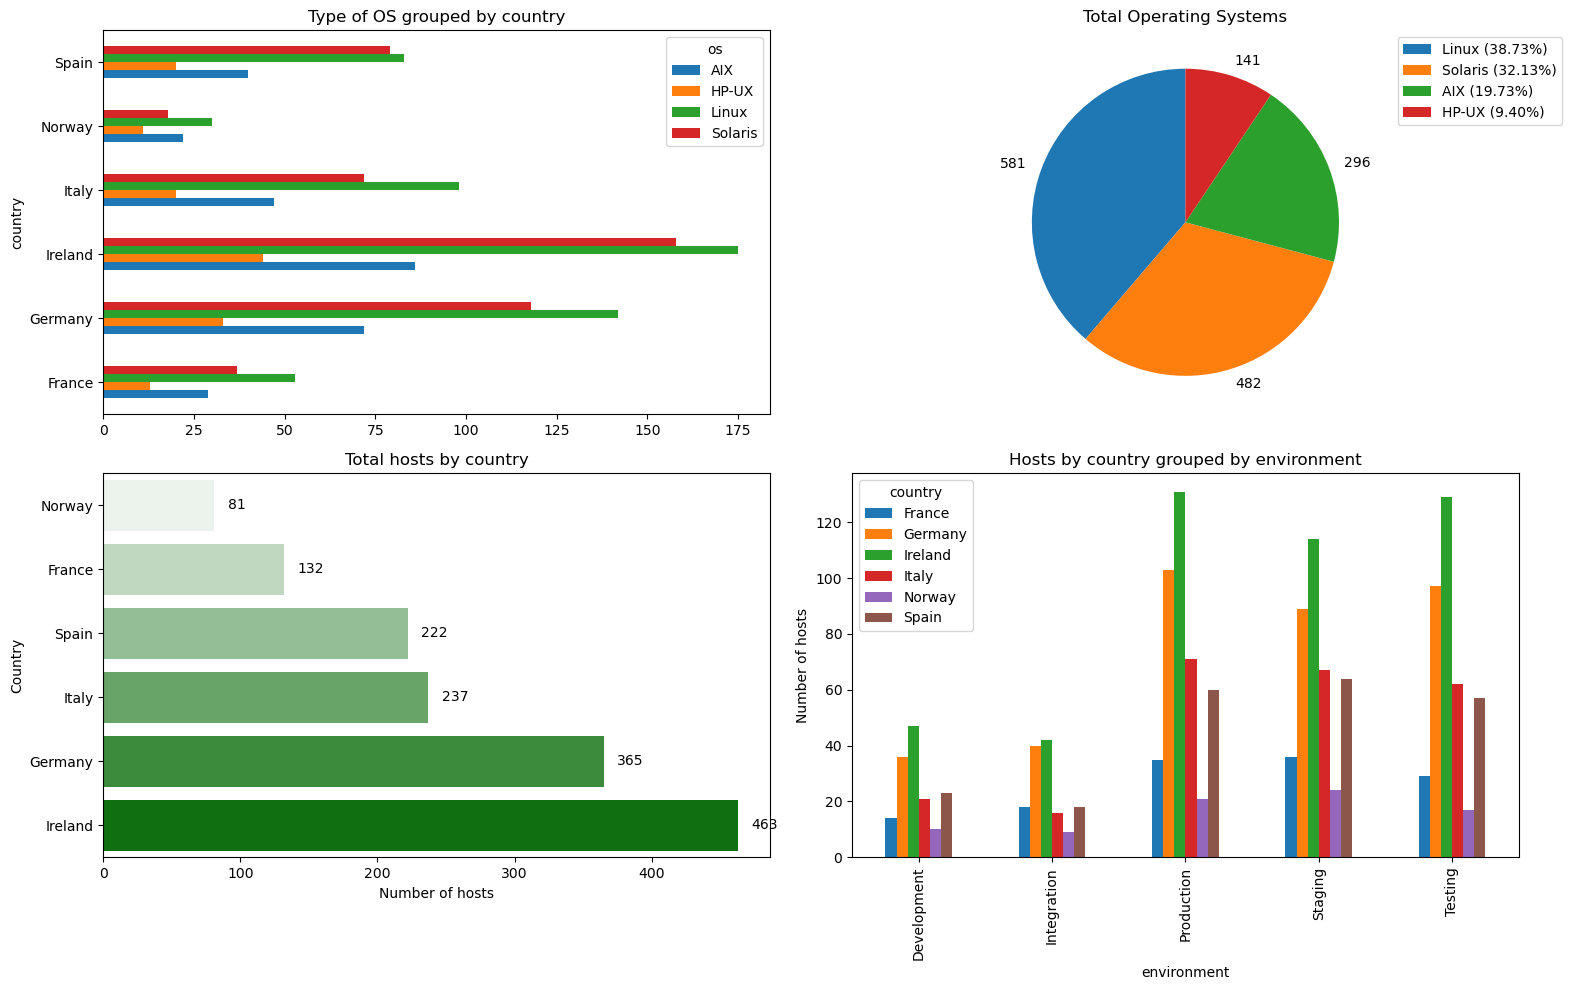

In [16]:
fig, axs = plt.subplots(2,2, figsize=(16,10))

#Subplot [0,0] Country-OS
hosts_os_country.plot(kind='barh', ax=axs[0,0])
axs[0,0].set_title('Type of OS grouped by country')

#Subplot [0,1] Total Operating Systems
os_counts.plot.pie(ax=axs[0, 1], labels = os_counts, startangle=90, ylabel='')
axs[0, 1].set_title('Total Operating Systems')
labels = [f'{os} ({percent:.2f}%)' for os, percent in zip(os_counts.index, os_percentages)]
axs[0, 1].legend(loc='upper right', labels=labels, bbox_to_anchor=(1.5,1))

#Subplot [1,0] Hosts by Country
num_colors = len(country_counts_sorted)
green_palette = sns.light_palette("green", n_colors=num_colors)
sns.barplot(x=hosts_sorted, y=countries_sorted, ax=axs[1,0], palette = green_palette, orient='h')
for i, v in enumerate(hosts_sorted):
    axs[1,0].text(v + 10, i, str(v), color='black', va='center')
axs[1,0].set_xlabel('Number of hosts')
axs[1,0].set_ylabel('Country')
axs[1,0].set_title('Total hosts by country')

#Subplot [1,1] Number of hosts
grouped_hosts.plot(kind='bar',ax=axs[1,1])
axs[1,1].set_ylabel('Number of hosts')
axs[1,1].set_title('Hosts by country grouped by environment')

plt.tight_layout()
plt.show()